# Importing All Libraries


In [1]:
!pip install nltk


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re,string,unicodedata
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\davey\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\davey\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
!pip install google-api-python-client

# Scrapping Data of YouTube Comments In Real Time 

In [4]:
import googleapiclient.discovery
from tqdm.notebook import tqdm  # Import tqdm for progress visualization

api_service_name = "youtube"
api_version = "v3"
DEVELOPER_KEY = "Enter Your Developer Key"

youtube = googleapiclient.discovery.build(
    api_service_name, api_version, developerKey=DEVELOPER_KEY
)

video_id = "d2skuWKVKBA"
max_results = 1000  # Set the desired maximum number of comments

next_page_token = None
comments = []

while True:
    request = youtube.commentThreads().list(
        part="snippet",
        videoId=video_id,
        maxResults=min(max_results, 100),  # API allows a maximum of 100 results per page
        pageToken=next_page_token
    )
    
    response = request.execute()
#     print(response)

    # Extract comments from the current page
    for item in response.get('items', []):
        comment = item['snippet']['topLevelComment']['snippet']
        comments.append([
            comment['authorDisplayName'],
            comment['publishedAt'],
            comment['updatedAt'],
            comment['likeCount'],
            comment['textDisplay']
        ])

    # Update progress
    tqdm.write(f"Processed {len(comments)} comments")

    # Check if there are more pages
    if 'nextPageToken' in response:
        next_page_token = response['nextPageToken']
    else:
        # No more pages, exit the loop
        break


Processed 100 comments
Processed 200 comments
Processed 300 comments
Processed 397 comments


# Converting, Importing Data and making a DataFrame

In [5]:
df = pd.DataFrame(comments, columns=['author', 'published_at', 'updated_at', 'like_count', 'text'])
df = df.reset_index()

In [6]:
#print dataframe
df.head(100)

,index,author,published_at,updated_at,like_count,text
0,0,@zLaunT,2023-12-13T10:58:29Z,2023-12-13T10:58:29Z,2,After 2 year definitely I will be in usa best ...
1,1,@savitasharma2116,2023-12-08T22:53:18Z,2023-12-08T22:53:18Z,0,❤
2,2,@trinitywr6347,2023-11-15T20:06:11Z,2023-11-15T20:06:11Z,0,"I didn’t score well in school , what exams can..."
3,3,@chanchalsharma1770,2023-11-02T10:51:04Z,2023-11-02T10:51:04Z,1,Please give me some personal tips for sat exam...
4,4,@iZuhaibAkhtar,2023-10-06T11:56:43Z,2023-10-06T11:56:43Z,0,"Sir, are there any SAT scholarships for Pakist..."
...,...,...,...,...,...,...
95,95,@binaramani3249,2021-06-26T18:49:09Z,2021-06-26T18:49:09Z,2,Sir please provide total cost range for engine...
96,96,@anirudhsoni9246,2021-06-24T18:21:42Z,2021-06-24T18:21:42Z,1,I got 92 percent in 12th boards I got 1321 in ...
97,97,@snehagupta925,2021-06-24T09:26:28Z,2021-06-24T09:29:28Z,1,Can we give SAT exam after 12th class ? Pls te...
98,98,@jatinyadav2246,2021-06-24T06:43:47Z,2021-06-24T06:44:05Z,1,"Bro I have a doubt, the extra curricular activ..."


# Cleaning Data and Preprocessing

In [7]:
!pip install nltk

In [8]:
#converting data text in lower:
df['text']=df['text'].apply(lambda x: " ".join(word.lower() for word in x.split()))
df.head()

,index,author,published_at,updated_at,like_count,text
0,0,@zLaunT,2023-12-13T10:58:29Z,2023-12-13T10:58:29Z,2,after 2 year definitely i will be in usa best ...
1,1,@savitasharma2116,2023-12-08T22:53:18Z,2023-12-08T22:53:18Z,0,❤
2,2,@trinitywr6347,2023-11-15T20:06:11Z,2023-11-15T20:06:11Z,0,"i didn’t score well in school , what exams can..."
3,3,@chanchalsharma1770,2023-11-02T10:51:04Z,2023-11-02T10:51:04Z,1,please give me some personal tips for sat exam...
4,4,@iZuhaibAkhtar,2023-10-06T11:56:43Z,2023-10-06T11:56:43Z,0,"sir, are there any sat scholarships for pakist..."


In [9]:
#removing symbols,emojis and special characters
df['text']=df['text'].str.replace('[^\w\s]','')
df.head()

C:\Users\davey\AppData\Local\Temp\ipykernel_36184\3542930211.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text']=df['text'].str.replace('[^\w\s]','')


,index,author,published_at,updated_at,like_count,text
0,0,@zLaunT,2023-12-13T10:58:29Z,2023-12-13T10:58:29Z,2,after 2 year definitely i will be in usa best ...
1,1,@savitasharma2116,2023-12-08T22:53:18Z,2023-12-08T22:53:18Z,0,
2,2,@trinitywr6347,2023-11-15T20:06:11Z,2023-11-15T20:06:11Z,0,i didnt score well in school what exams can i...
3,3,@chanchalsharma1770,2023-11-02T10:51:04Z,2023-11-02T10:51:04Z,1,please give me some personal tips for sat exam...
4,4,@iZuhaibAkhtar,2023-10-06T11:56:43Z,2023-10-06T11:56:43Z,0,sir are there any sat scholarships for pakista...


In [10]:
#removing stopwords
stop_words = stopwords.words('english')
len(stop_words)
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [11]:
df['text']=df['text'].apply(lambda x: " ".join(word for word in x.split() if x not in stop_words))
df.head()

,index,author,published_at,updated_at,like_count,text
0,0,@zLaunT,2023-12-13T10:58:29Z,2023-12-13T10:58:29Z,2,after 2 year definitely i will be in usa best ...
1,1,@savitasharma2116,2023-12-08T22:53:18Z,2023-12-08T22:53:18Z,0,
2,2,@trinitywr6347,2023-11-15T20:06:11Z,2023-11-15T20:06:11Z,0,i didnt score well in school what exams can i ...
3,3,@chanchalsharma1770,2023-11-02T10:51:04Z,2023-11-02T10:51:04Z,1,please give me some personal tips for sat exam...
4,4,@iZuhaibAkhtar,2023-10-06T11:56:43Z,2023-10-06T11:56:43Z,0,sir are there any sat scholarships for pakista...


In [12]:
df['text']=df['text'].str.replace('http\S+','')
df.head()

C:\Users\davey\AppData\Local\Temp\ipykernel_36184\2995801716.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text']=df['text'].str.replace('http\S+','')


,index,author,published_at,updated_at,like_count,text
0,0,@zLaunT,2023-12-13T10:58:29Z,2023-12-13T10:58:29Z,2,after 2 year definitely i will be in usa best ...
1,1,@savitasharma2116,2023-12-08T22:53:18Z,2023-12-08T22:53:18Z,0,
2,2,@trinitywr6347,2023-11-15T20:06:11Z,2023-11-15T20:06:11Z,0,i didnt score well in school what exams can i ...
3,3,@chanchalsharma1770,2023-11-02T10:51:04Z,2023-11-02T10:51:04Z,1,please give me some personal tips for sat exam...
4,4,@iZuhaibAkhtar,2023-10-06T11:56:43Z,2023-10-06T11:56:43Z,0,sir are there any sat scholarships for pakista...


In [13]:
#Lemmatization
!pip install textblob
from textblob import Word
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [14]:
 >>> import nltk
>>> nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\davey\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [15]:
df['text']=df['text'].apply(lambda x: " ".join(Word(word).lemmatize() for word in x.split()))
df.head()

,index,author,published_at,updated_at,like_count,text
0,0,@zLaunT,2023-12-13T10:58:29Z,2023-12-13T10:58:29Z,2,after 2 year definitely i will be in usa best ...
1,1,@savitasharma2116,2023-12-08T22:53:18Z,2023-12-08T22:53:18Z,0,
2,2,@trinitywr6347,2023-11-15T20:06:11Z,2023-11-15T20:06:11Z,0,i didnt score well in school what exam can i a...
3,3,@chanchalsharma1770,2023-11-02T10:51:04Z,2023-11-02T10:51:04Z,1,please give me some personal tip for sat exam ...
4,4,@iZuhaibAkhtar,2023-10-06T11:56:43Z,2023-10-06T11:56:43Z,0,sir are there any sat scholarship for pakistan...


# Sentiment Analysis

# VADER Sentiment Scoring

In [16]:
>>> nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\davey\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [17]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
sia=SentimentIntensityAnalyzer()

In [18]:
#Running Polarity scores for entire dataset of comments
result={}
res=[]
for i, row in tqdm(df.iterrows(), total=len(df)):
    text=row['text']
    myid=row['index']
    result[myid]=sia.polarity_scores(text)
    res.append(sia.polarity_scores(text)['compound'])

  0%|          | 0/397 [00:00<?, ?it/s]

In [19]:
result

{0: {'neg': 0.0, 'neu': 0.504, 'pos': 0.496, 'compound': 0.7845},
 1: {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0},
 2: {'neg': 0.142, 'neu': 0.858, 'pos': 0.0, 'compound': -0.2057},
 3: {'neg': 0.072, 'neu': 0.832, 'pos': 0.096, 'compound': 0.1431},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 6: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 7: {'neg': 0.0, 'neu': 0.941, 'pos': 0.059, 'compound': 0.3182},
 8: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 9: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 10: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 11: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 12: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 13: {'neg': 0.098, 'neu': 0.844, 'pos': 0.058, 'compound': -0.2263},
 14: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 15: {'neg': 0.0, 'neu': 0.671, 'pos': 0.329, 'compound': 0.6597},
 1

In [20]:
res

[0.7845,
 0.0,
 -0.2057,
 0.1431,
 0.0,
 0.0,
 0.0,
 0.3182,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.2263,
 0.0,
 0.6597,
 0.6597,
 0.0,
 0.0,
 0.9042,
 0.0,
 0.0,
 0.1139,
 -0.7783,
 0.3818,
 0.8126,
 -0.2732,
 -0.296,
 0.3182,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0772,
 0.4404,
 0.0,
 0.5106,
 0.0,
 0.2382,
 0.0,
 0.3612,
 0.0,
 0.0,
 -0.0516,
 0.0772,
 0.0,
 0.0,
 0.0,
 0.0,
 0.5574,
 0.0772,
 0.4939,
 0.0772,
 0.0516,
 0.0772,
 0.0,
 0.4404,
 0.0,
 0.2732,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.1531,
 0.3612,
 0.9202,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.2023,
 0.0,
 0.7906,
 0.0,
 0.0,
 -0.0772,
 0.0964,
 0.0,
 0.0,
 0.0,
 0.0772,
 0.2732,
 0.0,
 0.0,
 0.0,
 0.0,
 0.5574,
 0.0,
 0.0,
 0.0,
 0.3182,
 0.0,
 0.0772,
 0.2023,
 0.0,
 0.0,
 -0.3612,
 0.0,
 0.3182,
 -0.3818,
 0.4215,
 0.3612,
 0.296,
 -0.2732,
 0.0772,
 0.0,
 0.0,
 0.0,
 0.0,
 0.3182,
 0.0,
 0.729,
 0.4215,
 0.3182,
 0.0,
 0.4939,
 0.0,
 0.0,
 0.8595,
 0.3182,
 0.0,
 0.9331,
 0.0,
 0.7184,
 0.6808,
 0.0772,
 0.4754,
 0.8442,
 -

In [21]:
vaders=pd.DataFrame(result).T
vaders

,neg,neu,pos,compound
0,0.000,0.504,0.496,0.7845
1,0.000,0.000,0.000,0.0000
2,0.142,0.858,0.000,-0.2057
3,0.072,0.832,0.096,0.1431
4,0.000,1.000,0.000,0.0000
...,...,...,...,...
392,0.000,1.000,0.000,0.0000
393,0.412,0.588,0.000,-0.2732
394,0.000,1.000,0.000,0.0000
395,0.000,1.000,0.000,0.0000


In [22]:
vaders=vaders.reset_index()
vaders=vaders.merge(df,how='left')
vaders

,index,neg,neu,pos,compound,author,published_at,updated_at,like_count,text
0,0,0.000,0.504,0.496,0.7845,@zLaunT,2023-12-13T10:58:29Z,2023-12-13T10:58:29Z,2,after 2 year definitely i will be in usa best ...
1,1,0.000,0.000,0.000,0.0000,@savitasharma2116,2023-12-08T22:53:18Z,2023-12-08T22:53:18Z,0,
2,2,0.142,0.858,0.000,-0.2057,@trinitywr6347,2023-11-15T20:06:11Z,2023-11-15T20:06:11Z,0,i didnt score well in school what exam can i a...
3,3,0.072,0.832,0.096,0.1431,@chanchalsharma1770,2023-11-02T10:51:04Z,2023-11-02T10:51:04Z,1,please give me some personal tip for sat exam ...
4,4,0.000,1.000,0.000,0.0000,@iZuhaibAkhtar,2023-10-06T11:56:43Z,2023-10-06T11:56:43Z,0,sir are there any sat scholarship for pakistan...
...,...,...,...,...,...,...,...,...,...,...
392,392,0.000,1.000,0.000,0.0000,@dszvivian,2020-10-31T03:14:16Z,2020-10-31T03:14:16Z,1,awsome
393,393,0.412,0.588,0.000,-0.2732,@nishalraj9850,2020-10-31T03:14:07Z,2020-10-31T03:14:07Z,1,hey harnoor drop me
394,394,0.000,1.000,0.000,0.0000,@anmolakshattripathi1581,2020-10-31T03:13:54Z,2020-10-31T03:13:54Z,1,second
395,395,0.000,1.000,0.000,0.0000,@romanbrownlee6587,2020-10-31T03:13:47Z,2020-10-31T03:13:47Z,0,1st


In [23]:
vaders.dtypes

index             int64
neg             float64
neu             float64
pos             float64
compound        float64
author           object
published_at     object
updated_at       object
like_count        int64
text             object
dtype: object

In [24]:
#sns.set_style("whitegrid")
#sns.barplot(x='author',y='compound',data=vaders)

In [25]:
#for finding strong positive,positive and weak positive as well as strong negative,negative and weak negative and neutral
spositive=0
positive=0
wpositive=0
snegative=0
negative=0
wnegative=0
neutral=0

In [26]:
for x in res:
    i = x
    if (i == 0):  
        neutral += 1
    elif (i > 0 and i <= 0.3):
        wpositive += 1
    elif (i > 0.3 and i <= 0.6):
        positive += 1
    elif (i > 0.6 and i <= 1):
        spositive += 1
    elif (i > -0.3 and i <= 0):
        wnegative += 1
    elif (i > -0.6 and i <= -0.3):
        negative += 1
    elif (i > -1 and i <= -0.6):
        snegative += 1

In [27]:
totalTerms=len(vaders['text'])

In [28]:
print(spositive)
print(positive)
print(wpositive)
print(snegative)
print(negative)
print(wnegative)
print(neutral)

51
104
38
4
7
18
175


In [29]:
spositivepr = format(100 * float(spositive) / float(totalTerms), '0.2f')
positivepr = format(100 * float(positive) / float(totalTerms), '0.2f')
wpositivepr = format(100 * float(wpositive) / float(totalTerms), '0.2f')
snegativepr = format(100 * float(snegative) / float(totalTerms), '0.2f')
negativepr = format(100 * float(negative) / float(totalTerms), '0.2f')
wnegativepr = format(100 * float(wnegative) / float(totalTerms), '0.2f')
neutralpr = format(100 * float(neutral) / float(totalTerms), '0.2f')
p = format(100 * float(spositive+positive+wpositive) / float(totalTerms), '0.2f')
n = format(100 * float(snegative+negative+wnegative) / float(totalTerms), '0.2f')

In [30]:
print()
print("Detailed Report: ")
print(str(spositivepr) + "% people thought it was strongly positive")
print(str(positivepr) + "% people thought it was positive")
print(str(wpositivepr) + "% people thought it was weakly positive")
print(str(snegativepr) + "% people thought it was strongly negative")
print(str(negativepr) + "% people thought it was negative")
print(str(wnegativepr) + "% people thought it was weakly negative")
print(str(neutralpr) + "% people thought it was neutral")
print()
print("Overall:")
print(str(p) + "% people thought it was positive")
print(str(n) + "% people thought it was negative")
print(str(neutralpr) + "% people thought it was neutral")


Detailed Report: 
12.85% people thought it was strongly positive
26.20% people thought it was positive
9.57% people thought it was weakly positive
1.01% people thought it was strongly negative
1.76% people thought it was negative
4.53% people thought it was weakly negative
44.08% people thought it was neutral

Overall:
48.61% people thought it was positive
7.30% people thought it was negative
44.08% people thought it was neutral


In [31]:
com=pd.DataFrame(res,columns=['Comp']).T

In [32]:
com

,0,1,2,3,4,5,6,7,8,9,...,387,388,389,390,391,392,393,394,395,396
Comp,0.7845,0.0,-0.2057,0.1431,0.0,0.0,0.0,0.3182,0.0,0.0,...,0.2732,0.3612,0.0,0.0,0.0,0.0,-0.2732,0.0,0.0,0.0


In [33]:
outcomelist=[]
outcomelist.append(spositive)
outcomelist.append(positive)
outcomelist.append(wpositive)
outcomelist.append(snegative)
outcomelist.append(negative)
outcomelist.append(wnegative)
outcomelist.append(neutral)

In [34]:
outcomelist

[51, 104, 38, 4, 7, 18, 175]

In [35]:
outcome=pd.DataFrame(outcomelist,index=['spositive','positive','wpositive','snegative','negative','wnegative','neutral']).T

In [36]:
outcome

,spositive,positive,wpositive,snegative,negative,wnegative,neutral
0,51,104,38,4,7,18,175


[Text(0.5, 0, 'Analysis'),
 Text(0, 0.5, 'No. of Reviews'),
 Text(0.5, 1.0, 'No. of reviews with respect to categories')]

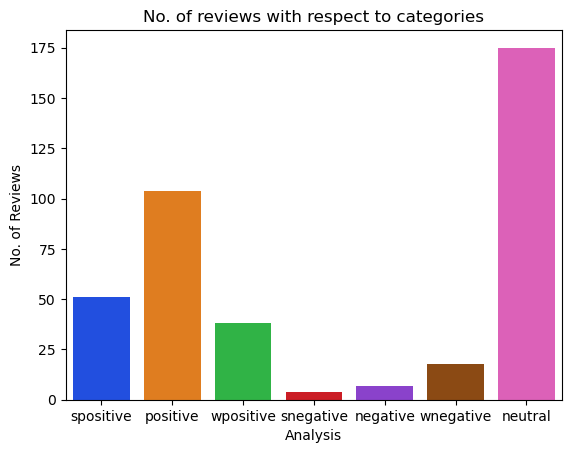

In [37]:
Ans2=sns.barplot(outcome,palette='bright')
Ans2.set(xlabel='Analysis',ylabel='No. of Reviews',title='No. of reviews with respect to categories')

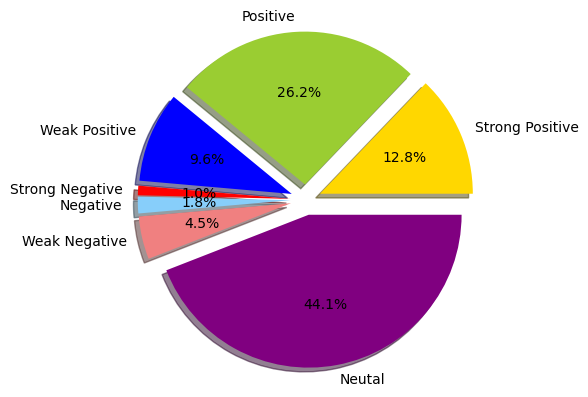

In [38]:
labels='Strong Positive','Positive','Weak Positive','Strong Negative','Negative','Weak Negative','Neutal'
sizes=[spositive,positive,wpositive,snegative,negative,wnegative,neutral]
colors=['gold','yellowgreen','blue','red','lightskyblue','lightcoral','purple']
explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1)
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True)
plt.axis('equal')
Ans3=plt.show()

# RoBERTa Pretrained Model Sentiment Analysis

In [39]:
#installing library of hugging interface
!pip install --upgrade transformers

In [40]:
from transformers import AutoTokenizer
from scipy.special import softmax

In [41]:
!pip install torch torchvision

In [42]:
!pip install torch

In [43]:
from transformers import AutoModelForSequenceClassification

In [44]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [45]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [46]:
resultroberta = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['text']
        myid = row['index']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        resultroberta[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/397 [00:00<?, ?it/s]

In [47]:
resultroberta

{0: {'vader_neg': 0.0,
  'vader_neu': 0.504,
  'vader_pos': 0.496,
  'vader_compound': 0.7845,
  'roberta_neg': 0.0019203734,
  'roberta_neu': 0.045063008,
  'roberta_pos': 0.95301664},
 1: {'vader_neg': 0.0,
  'vader_neu': 0.0,
  'vader_pos': 0.0,
  'vader_compound': 0.0,
  'roberta_neg': 0.2582943,
  'roberta_neu': 0.45127246,
  'roberta_pos': 0.29043326},
 2: {'vader_neg': 0.142,
  'vader_neu': 0.858,
  'vader_pos': 0.0,
  'vader_compound': -0.2057,
  'roberta_neg': 0.78425044,
  'roberta_neu': 0.20278676,
  'roberta_pos': 0.012962766},
 3: {'vader_neg': 0.072,
  'vader_neu': 0.832,
  'vader_pos': 0.096,
  'vader_compound': 0.1431,
  'roberta_neg': 0.08005148,
  'roberta_neu': 0.7804896,
  'roberta_pos': 0.13945888},
 4: {'vader_neg': 0.0,
  'vader_neu': 1.0,
  'vader_pos': 0.0,
  'vader_compound': 0.0,
  'roberta_neg': 0.097090594,
  'roberta_neu': 0.8807547,
  'roberta_pos': 0.022154683},
 5: {'vader_neg': 0.0,
  'vader_neu': 1.0,
  'vader_pos': 0.0,
  'vader_compound': 0.0,
  'ro

In [48]:
roberta=pd.DataFrame(resultroberta).T
roberta

,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos
0,0.000,0.504,0.496,0.7845,0.001920,0.045063,0.953017
1,0.000,0.000,0.000,0.0000,0.258294,0.451272,0.290433
2,0.142,0.858,0.000,-0.2057,0.784250,0.202787,0.012963
3,0.072,0.832,0.096,0.1431,0.080051,0.780490,0.139459
4,0.000,1.000,0.000,0.0000,0.097091,0.880755,0.022155
...,...,...,...,...,...,...,...
392,0.000,1.000,0.000,0.0000,0.094005,0.623838,0.282158
393,0.412,0.588,0.000,-0.2732,0.117299,0.804714,0.077988
394,0.000,1.000,0.000,0.0000,0.188460,0.587202,0.224337
395,0.000,1.000,0.000,0.0000,0.206442,0.524558,0.269000


In [49]:
roberta=roberta.reset_index()
roberta=roberta.merge(df,how='left')
roberta

,index,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,author,published_at,updated_at,like_count,text
0,0,0.000,0.504,0.496,0.7845,0.001920,0.045063,0.953017,@zLaunT,2023-12-13T10:58:29Z,2023-12-13T10:58:29Z,2,after 2 year definitely i will be in usa best ...
1,1,0.000,0.000,0.000,0.0000,0.258294,0.451272,0.290433,@savitasharma2116,2023-12-08T22:53:18Z,2023-12-08T22:53:18Z,0,
2,2,0.142,0.858,0.000,-0.2057,0.784250,0.202787,0.012963,@trinitywr6347,2023-11-15T20:06:11Z,2023-11-15T20:06:11Z,0,i didnt score well in school what exam can i a...
3,3,0.072,0.832,0.096,0.1431,0.080051,0.780490,0.139459,@chanchalsharma1770,2023-11-02T10:51:04Z,2023-11-02T10:51:04Z,1,please give me some personal tip for sat exam ...
4,4,0.000,1.000,0.000,0.0000,0.097091,0.880755,0.022155,@iZuhaibAkhtar,2023-10-06T11:56:43Z,2023-10-06T11:56:43Z,0,sir are there any sat scholarship for pakistan...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,392,0.000,1.000,0.000,0.0000,0.094005,0.623838,0.282158,@dszvivian,2020-10-31T03:14:16Z,2020-10-31T03:14:16Z,1,awsome
393,393,0.412,0.588,0.000,-0.2732,0.117299,0.804714,0.077988,@nishalraj9850,2020-10-31T03:14:07Z,2020-10-31T03:14:07Z,1,hey harnoor drop me
394,394,0.000,1.000,0.000,0.0000,0.188460,0.587202,0.224337,@anmolakshattripathi1581,2020-10-31T03:13:54Z,2020-10-31T03:13:54Z,1,second
395,395,0.000,1.000,0.000,0.0000,0.206442,0.524558,0.269000,@romanbrownlee6587,2020-10-31T03:13:47Z,2020-10-31T03:13:47Z,0,1st


In [50]:
positive_roberta=0
negative_roberta=0
neutral_roberta=0

In [51]:
pos=[]
for x in roberta['roberta_pos']:
    pos.append(x)
pos

[0.9530166387557983,
 0.29043325781822205,
 0.012962765991687775,
 0.13945887982845306,
 0.022154683247208595,
 0.04758860170841217,
 0.057611677795648575,
 0.029014097526669502,
 0.08436806499958038,
 0.02736986242234707,
 0.0332697257399559,
 0.262505441904068,
 0.03918987885117531,
 0.21867921948432922,
 0.004640285857021809,
 0.04205924645066261,
 0.09399840235710144,
 0.038240596652030945,
 0.02876194566488266,
 0.12038595974445343,
 0.07416202127933502,
 0.010198346339166164,
 0.0156532134860754,
 0.0021602767519652843,
 0.013662935234606266,
 0.4053734838962555,
 0.08311553299427032,
 0.03372931480407715,
 0.08781825006008148,
 0.0398968867957592,
 0.02697032131254673,
 0.27214667201042175,
 0.03620792180299759,
 0.04394135996699333,
 0.09115356206893921,
 0.04908256232738495,
 0.11021289974451065,
 0.3422297239303589,
 0.019934479147195816,
 0.07062318176031113,
 0.06651031225919724,
 0.09647173434495926,
 0.026629671454429626,
 0.977976381778717,
 0.023817958310246468,
 0.0658

In [52]:
neg=[]
for x in roberta['roberta_neg']:
    neg.append(x)
neg

[0.0019203734118491411,
 0.25829431414604187,
 0.7842504382133484,
 0.0800514817237854,
 0.09709059447050095,
 0.036701664328575134,
 0.03538452088832855,
 0.13469083607196808,
 0.030380163341760635,
 0.5477219223976135,
 0.03788204491138458,
 0.15224689245224,
 0.11027956753969193,
 0.16654905676841736,
 0.9008632302284241,
 0.033350031822919846,
 0.41133010387420654,
 0.06479332596063614,
 0.1503237932920456,
 0.0835474282503128,
 0.03232972323894501,
 0.7632063627243042,
 0.6651601195335388,
 0.9690418839454651,
 0.6728907823562622,
 0.011982396245002747,
 0.03892548754811287,
 0.5571790337562561,
 0.11314462870359421,
 0.05656202882528305,
 0.15173591673374176,
 0.027879199013113976,
 0.12057442963123322,
 0.060945864766836166,
 0.18208469450473785,
 0.04153454303741455,
 0.06503195315599442,
 0.08130965381860733,
 0.14145073294639587,
 0.2053893357515335,
 0.04385538026690483,
 0.2607671916484833,
 0.5880400538444519,
 0.0027662592474371195,
 0.12797750532627106,
 0.02965864725410

In [53]:
neu=[]
for x in roberta['roberta_neu']:
    neu.append(x)
neu

[0.04506300762295723,
 0.45127245783805847,
 0.20278675854206085,
 0.7804896235466003,
 0.8807547092437744,
 0.9157097339630127,
 0.9070038199424744,
 0.8362950682640076,
 0.8852518200874329,
 0.42490822076797485,
 0.9288482666015625,
 0.5852476954460144,
 0.8505305051803589,
 0.6147717833518982,
 0.09449651837348938,
 0.9245908260345459,
 0.4946715235710144,
 0.8969660997390747,
 0.8209143280982971,
 0.7960666418075562,
 0.8935083150863647,
 0.22659525275230408,
 0.31918662786483765,
 0.028797771781682968,
 0.3134463131427765,
 0.5826441645622253,
 0.8779589533805847,
 0.40909162163734436,
 0.7990370988845825,
 0.9035410284996033,
 0.8212937116622925,
 0.6999741792678833,
 0.8432177305221558,
 0.8951128125190735,
 0.7267618179321289,
 0.9093828797340393,
 0.8247551918029785,
 0.5764605402946472,
 0.838614821434021,
 0.7239874601364136,
 0.8896342515945435,
 0.6427610516548157,
 0.38533031940460205,
 0.01925739459693432,
 0.8482045531272888,
 0.9044445157051086,
 0.3069877326488495,
 0

In [54]:
for x in range(totalTerms):
    if (pos[x]>neg[x] and pos[x]>neu[x]):
        positive_roberta+=1
    elif (neg[x]>pos[x] and neg[x]>neu[x]):
        negative_roberta+=1
    elif (neu[x]>pos[x] and neu[x]>neg[x]):
        neutral_roberta+=1

In [55]:
print()
print("Detailed Report: ")
print(str(positive_roberta) + " people thought it is positive")
print(str(negative_roberta) + " people thought it is negative")
print(str(neutral_roberta) + " people thought it is neutal")


Detailed Report: 
81 people thought it is positive
33 people thought it is negative
283 people thought it is neutal


In [56]:
roberta_outcome_list=[]
roberta_outcome_list.append(positive_roberta)
roberta_outcome_list.append(negative_roberta)
roberta_outcome_list.append(neutral_roberta)

In [57]:
roberta_outcome_list

[81, 33, 283]

In [58]:
roberta_df=pd.DataFrame(roberta_outcome_list,index=['positive_roberta','negative_roberta','neutral_roberta']).T
roberta_df

,positive_roberta,negative_roberta,neutral_roberta
0,81,33,283


[Text(0.5, 0, 'Type'),
 Text(0, 0.5, 'No. of Reviews'),
 Text(0.5, 1.0, 'No. of reviews with respect to categories')]

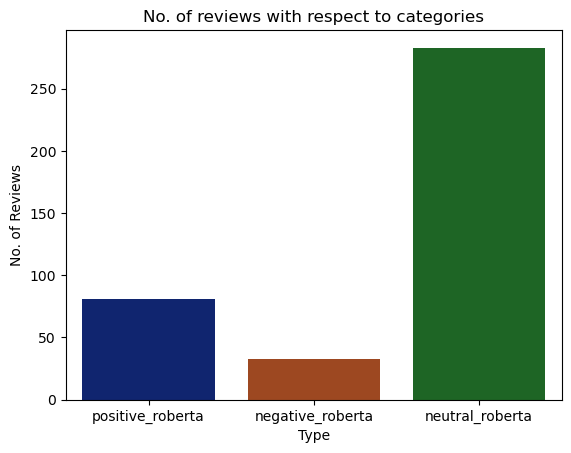

In [59]:
Ans4=sns.barplot(data=roberta_df,palette='dark')
Ans4.set(xlabel='Type',ylabel='No. of Reviews',title='No. of reviews with respect to categories')

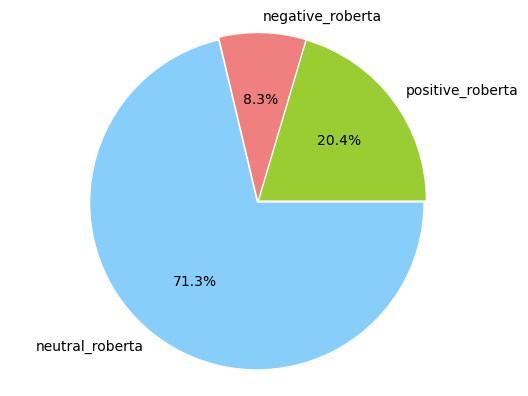

In [60]:
labels='positive_roberta','negative_roberta','neutral_roberta'
sizes=[positive_roberta,negative_roberta,neutral_roberta]
colors=['yellowgreen','lightcoral','lightskyblue']
explode=(0.01,0.01,0.01)
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',shadow=False)
plt.axis('equal')
Ans5=plt.show()